In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("Mall_Customers.csv")
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
real_x = data.iloc[:,[3,4]].values


In [7]:
noofclu = 16
wcss = []
for i in range(1,noofclu):
    k_mean = KMeans(n_clusters=i,init = "k-means++",random_state = 42)
    k_mean.fit(real_x)
    wcss.append(k_mean.inertia_)
#     print(k_mean.inertia_)
print(wcss)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.83934915659, 21850.165282585633, 19672.07284901432, 17887.08445662864, 15917.60968942786, 14312.66860916861, 12802.791660300483, 11702.17388999889]


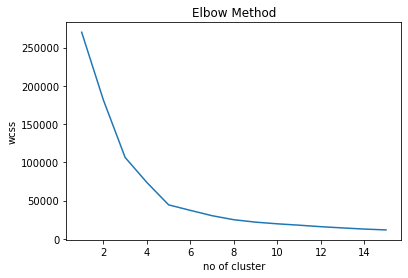

In [9]:
plt.plot(range(1,noofclu),wcss)
plt.title("Elbow Method")
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.show()

In [11]:
#There r 5 cluster
k_mean = KMeans(n_clusters= 5,init = "k-means++",random_state = 42)
pred = k_mean.fit_predict(real_x)
print(pred)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


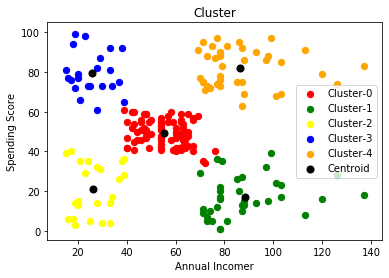

In [14]:

size = 40
plt.scatter(real_x[pred == 0,0],real_x[pred == 0,1],s = size,c = "red")
plt.scatter(real_x[pred == 1,0],real_x[pred == 1,1],s = size,c = "green")
plt.scatter(real_x[pred == 2,0],real_x[pred == 2,1],s = size,c = "yellow")
plt.scatter(real_x[pred == 3,0],real_x[pred == 3,1],s = size,c = "blue")
plt.scatter(real_x[pred == 4,0],real_x[pred == 4,1],s = size,c = "orange")
#centroid
plt.scatter(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1],s = 50,c = "black")
plt.title("Cluster")
plt.xlabel("Annual Incomer")
plt.ylabel("Spending Score")
plt.legend(["Cluster-0","Cluster-1","Cluster-2","Cluster-3","Cluster-4","Centroid"])
plt.show()